In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/home/nicoli/github/ssd_keras/dataset/csv/imdb_csv/imdb_clean.csv', index_col=0)

In [5]:
model = KMeans(n_clusters=5)
labels = model.fit_predict(df['age'].values.reshape(-1,1))
palette = model.cluster_centers_

In [6]:
#palette.sort(0)
palette = palette.astype(int).astype(str)
palette

array([['18'],
       ['40'],
       ['68'],
       ['29'],
       ['52']], dtype='<U21')

In [7]:
idades_clusterizadas = palette[labels]

In [8]:
idades_clusterizadas

array([['52'],
       ['29'],
       ['52'],
       ...,
       ['40'],
       ['40'],
       ['40']], dtype='<U21')

In [9]:
df['age_categories'] = idades_clusterizadas

In [10]:
df.age_categories = df.age_categories.astype('category')
df.gender = df.gender.astype('category')

In [11]:
df_melted = pd.melt(df, "age", var_name="measurement")

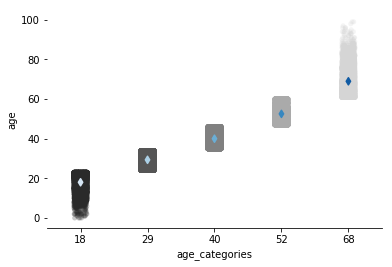

In [47]:
f, ax = plt.subplots()
sns.despine(bottom=False, left=True)

sns.stripplot(y="age", x='age_categories', #hue='age_categories',
              data=df, dodge=True, jitter=True, palette='gray',
              alpha=.25, zorder=1)

sns.pointplot(y="age", x="age_categories", #hue='age_categories',
              data=df, dodge=.532, join=False, palette="Blues",
              markers="d", scale=.75, ci=None)

f.savefig('clusters.png')
